The purpose of this notebook is to look for outliers in the portfolio1 dataset.
I also plot some 3D visualizations of the data, and build custom standarization and normalization funcions.

In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
import umap as umap


def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../app/data/portfolio1_ETL.csv'
portfolio1 = load_data(filepath)

portfolio1 = portfolio1.drop(columns=['id'])
portfolio1.head()

idade_empresa_anos  de_faixa_faturamento_estimado_ATE R$ 81.000,00  \
0                0.65                                               0   
1                6.59                                               0   
2                8.01                                               0   
3               20.86                                               0   
4               18.73                                               0   

   de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  1                    

   de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                                  0                      
1                                                  0                      
2                                                  0                      
3                                                  0                      
4                                                  0                      

   de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

   de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

   de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                 

In [2]:
portfolio1.select_dtypes(exclude='int64')

idade_empresa_anos
0                  0.65
1                  6.59
2                  8.01
3                 20.86
4                 18.73
..                  ...
550               27.66
551                1.60
552               31.87
553                0.97
554                3.99

[555 rows x 1 columns]

In [3]:
from sklearn.preprocessing import StandardScaler


df = portfolio1
teste = StandardScaler().fit_transform(portfolio1)

df.loc[:,:] = teste
df

idade_empresa_anos  de_faixa_faturamento_estimado_ATE R$ 81.000,00  \
0             -0.985073                                       -0.341614   
1             -0.368439                                       -0.341614   
2             -0.221028                                       -0.341614   
3              1.112935                                       -0.341614   
4              0.891819                                       -0.341614   
..                  ...                                             ...   
550            1.818846                                       -0.341614   
551           -0.886453                                       -0.341614   
552            2.255887                                       -0.341614   
553           -0.951853                                       -0.341614   
554           -0.638346                                       -0.341614   

     de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00  \
0                                            -0.172292                    
1                                            -0.172292                    
2                                            -0.172292                    
3                                            -0.172292                    
4                                             5.804093                    
..                                                 ...                    
550                                          -0.172292                    
551                                          -0.172292                    
552                                          -0.172292                    
553                                          -0.172292                    
554                                          -0.172292                    

     de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00  \
0                                            -0.042486                      
1                                            -0.042486                      
2                                            -0.042486                      
3                                            -0.042486                      
4                                            -0.042486                      
..                                                 ...                      
550                                          -0.042486                      
551                                          -0.042486                      
552                                          -0.042486                      
553                                          -0.042486                      
554                                          -0.042486                      

     de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00  \
0                                                  0.0                        
1                                                  0.0                        
2                                                  0.0                        
3                                                  0.0                        
4                                                  0.0                        
..                                                 ...                        
550                                                0.0                        
551                                                0.0                        
552                                                0.0                        
553                                                0.0                        
554                                                0.0                        

     de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00  \
0                                                  0.0                       
1                                                  0.0                       
2                                                  0.0                       
3                

In [4]:
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

reducer = umap.UMAP()
embedding = reducer.fit_transform(portfolio1)
embedding.shape

(555, 2)

Text(0.5, 1.0, 'UMAP projection of portfolio1')

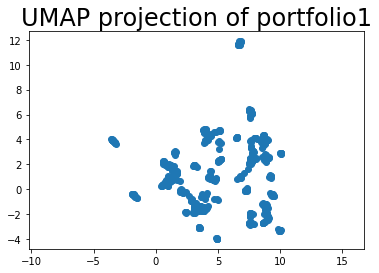

In [5]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
    #c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of portfolio1', fontsize=24)

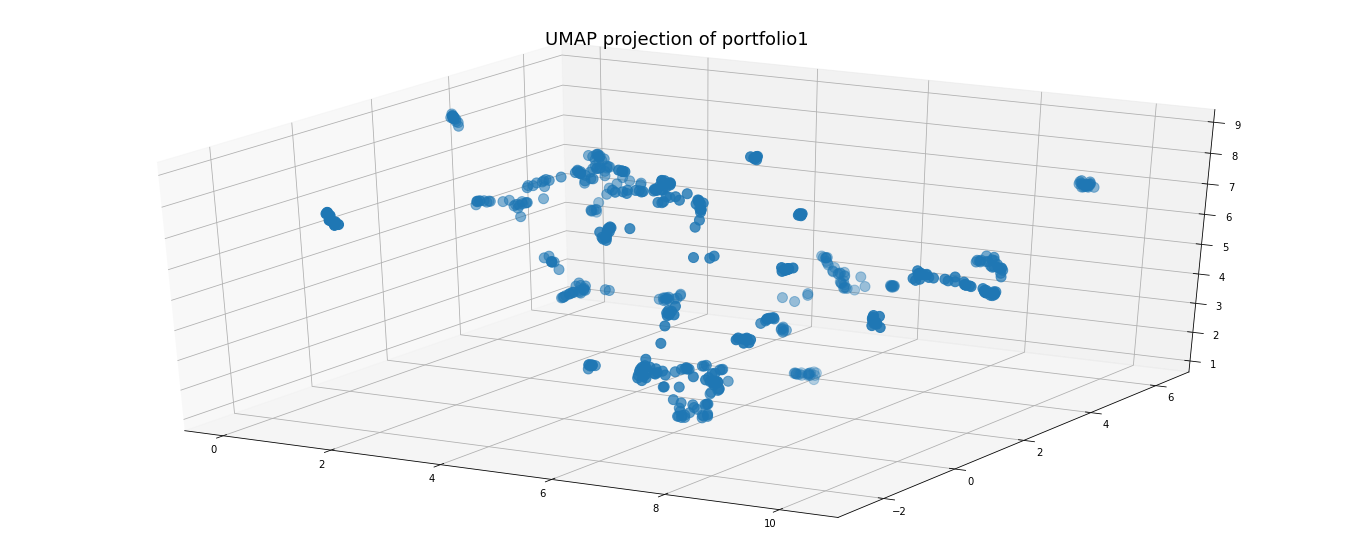

In [6]:

def draw_umap(data, n_neighbors, min_dist, n_components, title, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure(figsize=(24,10))
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)
    
title = 'UMAP projection of portfolio1'    
draw_umap(portfolio1,14,0.1,3,title)

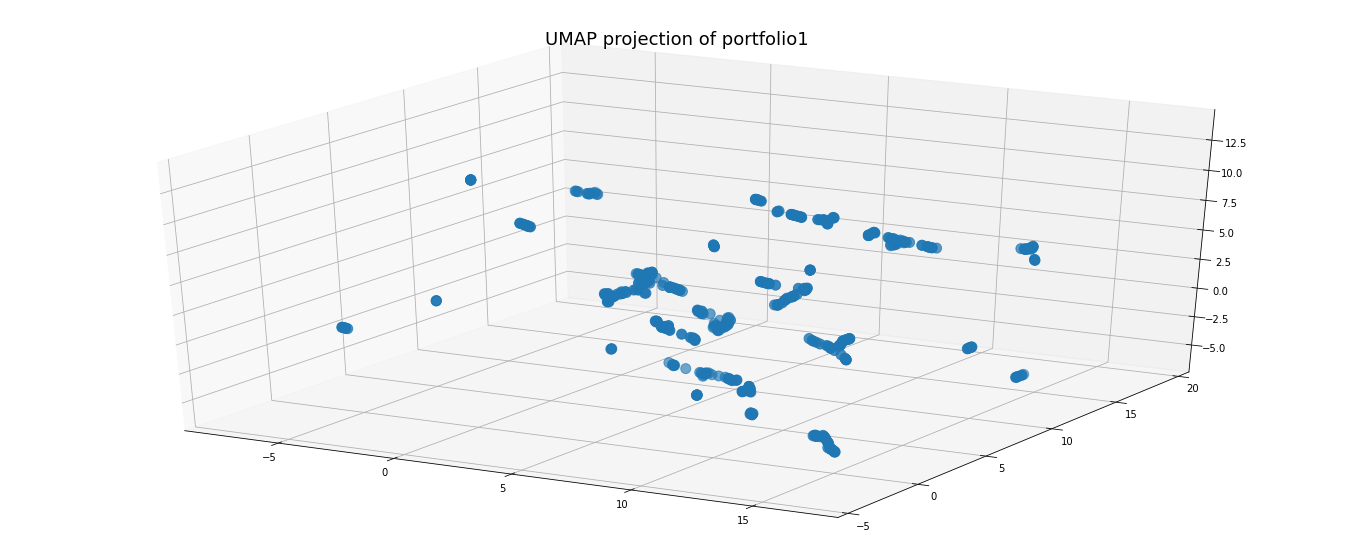

In [7]:
#low n_neighbours focus more on local distribution
draw_umap(portfolio1,5,0.1,3,title)

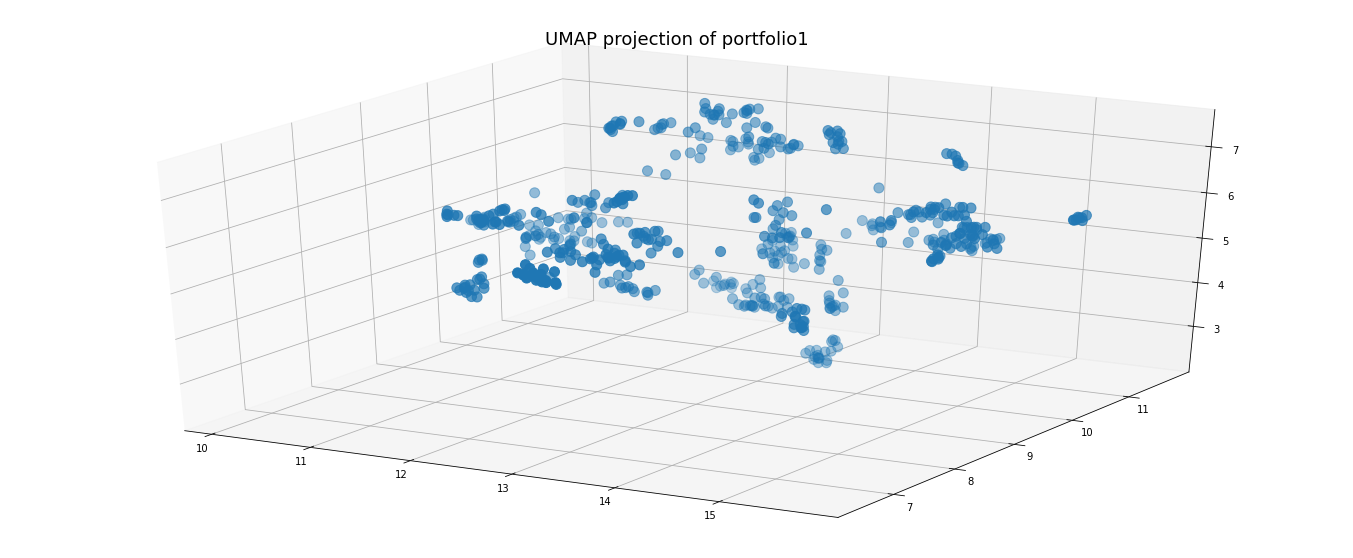

In [8]:
#high n_neighbours focus more on global distribution
draw_umap(portfolio1,50,0.1,3,title)

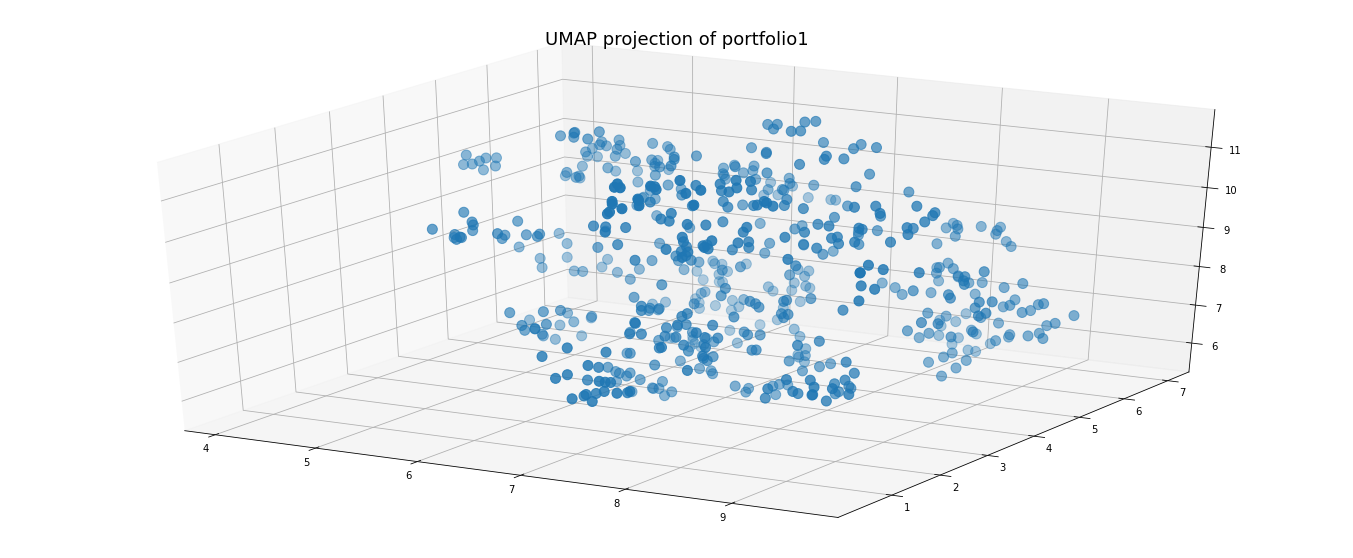

In [9]:
draw_umap(portfolio1,50,0.5,3,title)

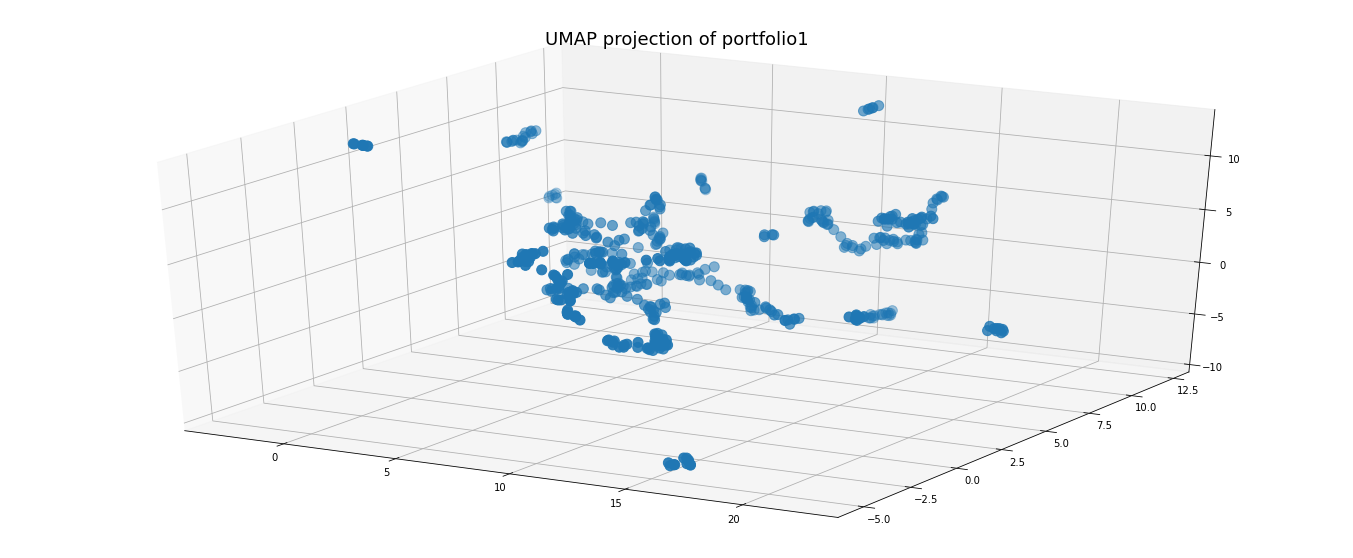

In [10]:
draw_umap(portfolio1,5,0.5,3,title)

In [11]:
from sklearn.neighbors import LocalOutlierFactor

outlier_scores = LocalOutlierFactor(contamination=0.001428).fit_predict(portfolio1)

In [12]:
outlying_digits = portfolio1[outlier_scores == -1]
outlying_digits.shape

(1, 170)

In [13]:
mapper = umap.UMAP().fit(portfolio1)
outlier_scores_umap = LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)

In [14]:
outlying_digits_umap = portfolio1[outlier_scores_umap == -1]
outlying_digits_umap.shape

(1, 170)

In [15]:
mapper = umap.UMAP(set_op_mix_ratio=0.25).fit(portfolio1)
outlier_scores_umap = LocalOutlierFactor(contamination=0.001428).fit_predict(mapper.embedding_)
outlying_digits_umap = portfolio1[outlier_scores_umap == -1]
outlying_digits_umap.shape

(1, 170)

Only one entry was considered an outlier according to these parameters.

Now I will use these results and clusterize with the UMAP preprocessing just to have something to compare to later on.

In [16]:

fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )
u = fit.fit_transform(portfolio1)

In [17]:
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = random_state)
    kmeans.fit(u)
    wss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wss, name='elbow', mode='lines'))

fig.update_layout(title='The Elbow Method', 
                  xaxis={"title": "Number of clusters"},
                  yaxis={"title": "Within Sum of Squares"})

fig.show()

In [18]:
X = fit.fit_transform(portfolio1)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

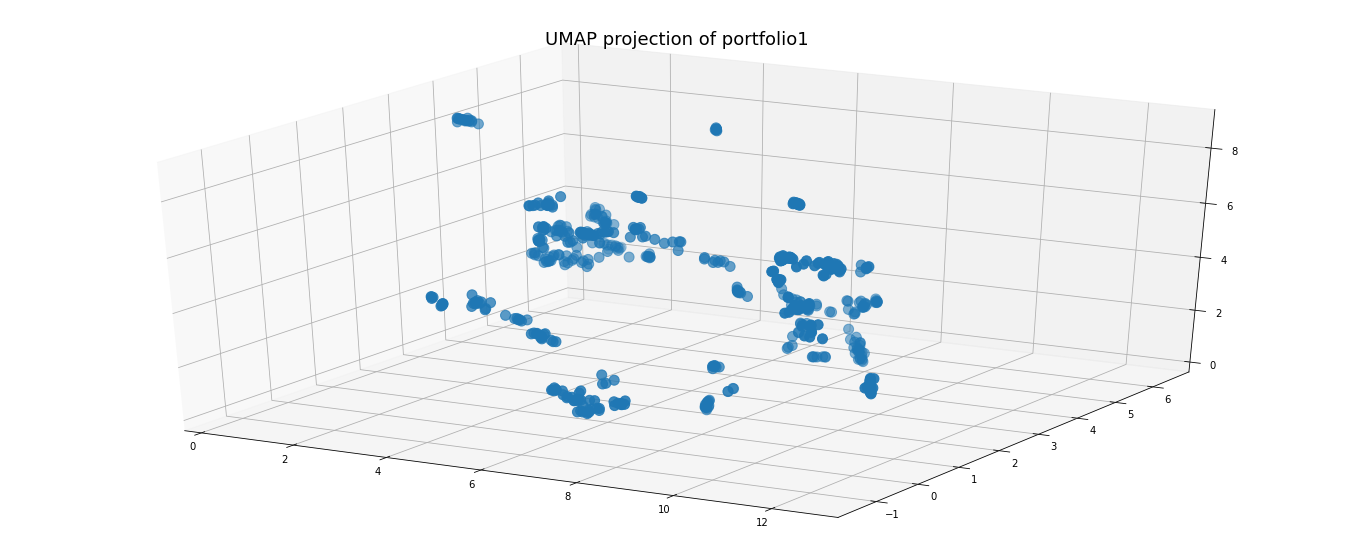

In [19]:
draw_umap(df,14,0.1,3,title)

In [20]:
fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        metric='euclidean'
    )

X = fit.fit_transform(df)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()